In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 


%matplotlib inline 

import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
warnings.filterwarnings("ignore",message="The figure layout has changed to tight")


In [2]:
df = pd.read_csv('Lifestyle_data Final Project.csv')

In [3]:
df.head()

,class_date,user_uuid,category,coach_id,language,level,challenge_id,country,subscription_date,platform,class_id,stars
0,1-2-2023,2,meditation,102,it,basic,3,it,6-1-2022,tv,2157,1
1,22-5-2023,241,power yoga,111,it,basic,1,it,11-5-2022,pc,6172,3
2,6-8-2022,173,power yoga,117,it,advanced,3,it,12-12-2021,pc,6255,2
3,8-8-2023,217,hatha,100,en,intermediate,3,uk,7-2-2022,tv,3317,4
4,11-3-2022,230,power yoga,113,fr,basic,2,fr,9-1-2020,pc,6159,1


In [4]:
df.shape

(999, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   class_date         999 non-null    object
 1   user_uuid          999 non-null    int64 
 2   category           999 non-null    object
 3   coach_id           999 non-null    int64 
 4   language           999 non-null    object
 5   level              999 non-null    object
 6   challenge_id       999 non-null    int64 
 7   country            999 non-null    object
 8   subscription_date  999 non-null    object
 9   platform           999 non-null    object
 10  class_id           999 non-null    int64 
 11  stars              999 non-null    int64 
dtypes: int64(5), object(7)
memory usage: 93.8+ KB


In [6]:
df.describe().round(3)

,user_uuid,coach_id,challenge_id,class_id,stars
count,999.000,999.000,999.000,999.000,999.000
mean,120.665,111.196,1.505,4171.795,3.018
std,71.169,6.553,1.121,1878.218,1.424
min,1.000,100.000,0.000,211.000,1.000
25%,58.500,106.000,1.000,3149.000,2.000
50%,118.000,111.000,1.000,4220.000,3.000
75%,182.000,117.000,3.000,6215.000,4.000
max,245.000,122.000,3.000,6399.000,5.000


In [7]:
df.nunique()

class_date           554
user_uuid            240
category               4
coach_id              23
language               3
level                  3
challenge_id           4
country                3
subscription_date    219
platform               3
class_id             636
stars                  5
dtype: int64

- La colonna 'class_date'  mostra una significativa varietà di date, indicando che il dataset copre un ampio arco temporale.
- Ci sono 240 utenti unici, ma considerando che ci sono 999 record, molti utenti hanno partecipato a più di una classe.
- Con 4 categorie di classi, 23 coach diversi e 636 ID di classe unici, il dataset riflette una vasta gamma di offerte di classi.
- La presenza di 3 lingue e 3 livelli di difficoltà suggerisce una certa varietà nell'offerta delle classi per coprire diverse esigenze.
- La presenza di utenti da 3 paesi diversi indica un pubblico internazionale.
- L'esistenza di 3 diverse piattaforme mostra i modi in cui gli utenti partecipano alle classi.
- La varietà nelle valutazioni (5 valori unici) offre la possibilità di capire come vengono percepite le classi dagli utenti.



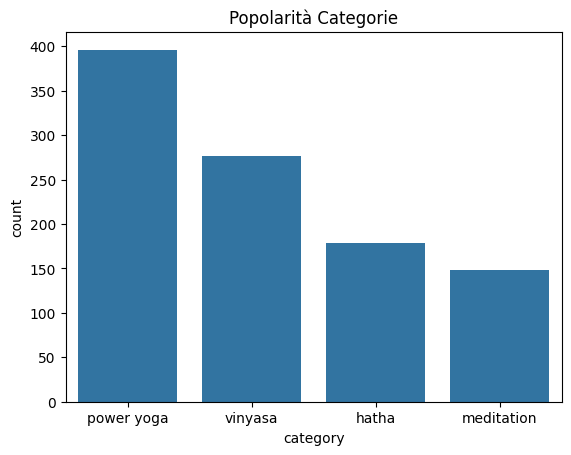

In [8]:
order_cat = df['category'].value_counts().index

sns.countplot(data=df,x='category', order = order_cat)
plt.title('Popolarità Categorie')
plt.show()

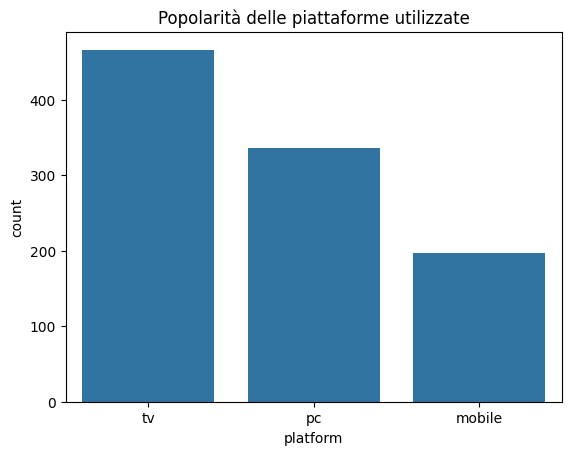

In [9]:
order_plat = df['platform'].value_counts().index

sns.countplot(data=df, x= 'platform', order= order_plat)
plt.title('Popolarità delle piattaforme utilizzate')
plt.show()

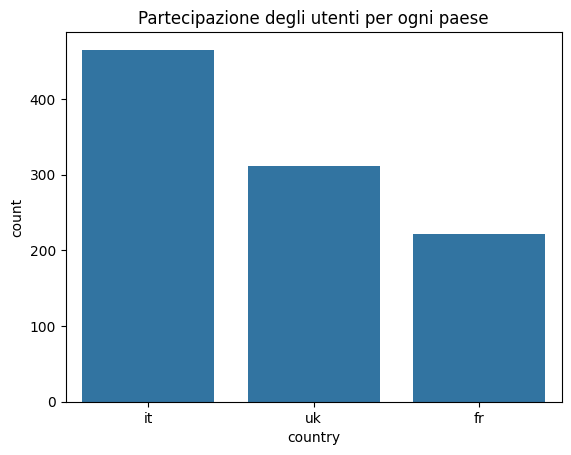

In [10]:
order_country = df['country'].value_counts().index

sns.countplot(data=df, x= 'country', order = order_country)
plt.title('Partecipazione degli utenti per ogni paese')
plt.show()

- Adesso parto con l'analisi che voglio fare, conta solo da df.describe(
)

prepariamo la time series

In [11]:
df['class_date'] = pd.to_datetime(df['class_date'], format= '%d-%m-%Y')

df_2021 = df[df['class_date'].dt.year == 2021].copy()

In [12]:
timeser_2021 =(df_2021).copy()

timeser_2021.set_index('class_date',inplace=True)

In [13]:
mediaDfQuart_2021 = timeser_2021.resample('M').count()
mediaDfQuart_2021

,user_uuid,category,coach_id,language,level,challenge_id,country,subscription_date,platform,class_id,stars
class_date,,,,,,,,,,,
2021-01-31,2,2,2,2,2,2,2,2,2,2,2
2021-02-28,5,5,5,5,5,5,5,5,5,5,5
2021-03-31,6,6,6,6,6,6,6,6,6,6,6
2021-04-30,4,4,4,4,4,4,4,4,4,4,4
2021-05-31,7,7,7,7,7,7,7,7,7,7,7
2021-06-30,10,10,10,10,10,10,10,10,10,10,10
2021-07-31,14,14,14,14,14,14,14,14,14,14,14
2021-08-31,9,9,9,9,9,9,9,9,9,9,9
2021-09-30,14,14,14,14,14,14,14,14,14,14,14


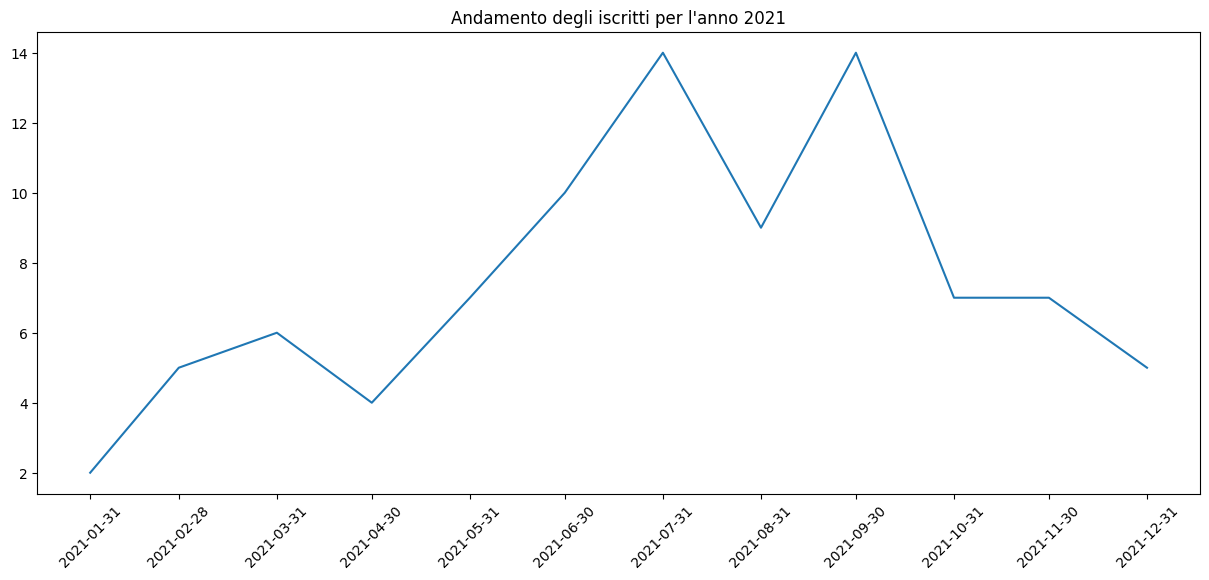

In [14]:
#Serie Temporale sugli abbonati
plt.figure(figsize=(15,6))
plt.plot(mediaDfQuart_2021.index,mediaDfQuart_2021['user_uuid'])
plt.title("Andamento degli iscritti per l'anno 2021")
plt.xticks(mediaDfQuart_2021.index,rotation = 45)
plt.show()

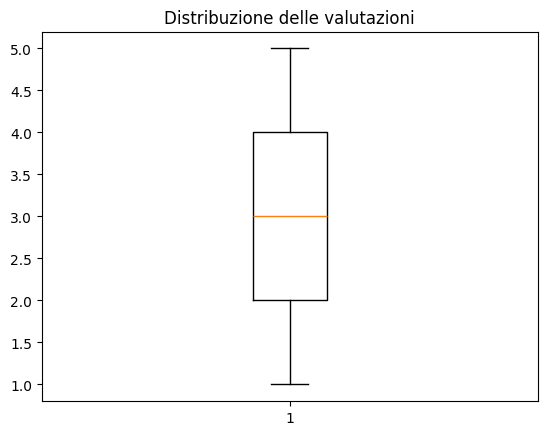

In [15]:

plt.boxplot(data=df_2021, x= 'stars')
plt.title('Distribuzione delle valutazioni')
plt.show()

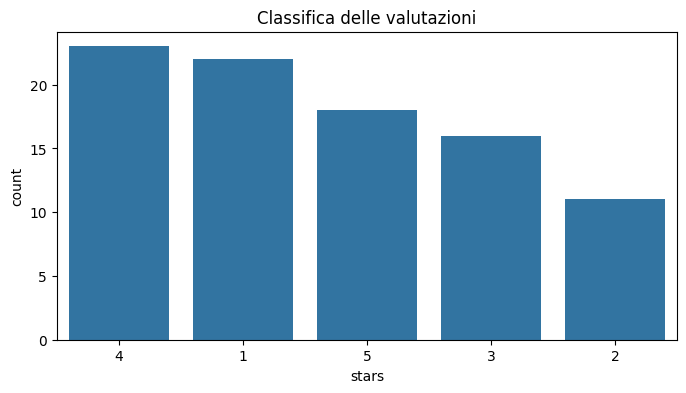

In [16]:
stars_order = df_2021['stars'].value_counts().index

plt.figure(figsize=(8,4))
sns.countplot(data=df_2021, x= 'stars',order= stars_order)
plt.title('Classifica delle valutazioni')
plt.show()

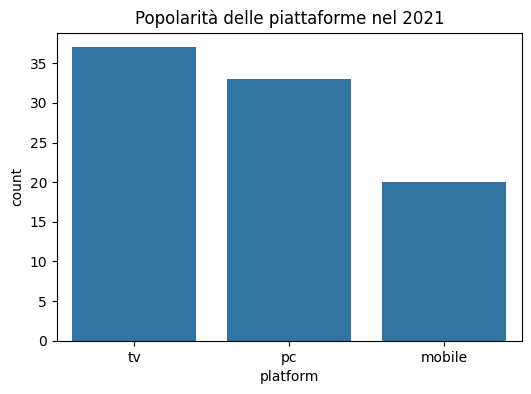

In [17]:
#Classifica sull'uso delle piattaforme
plt.figure(figsize=(6,4))
sns.countplot(data=df_2021, x='platform', order= order_plat)
plt.title('Popolarità delle piattaforme nel 2021')
plt.show()

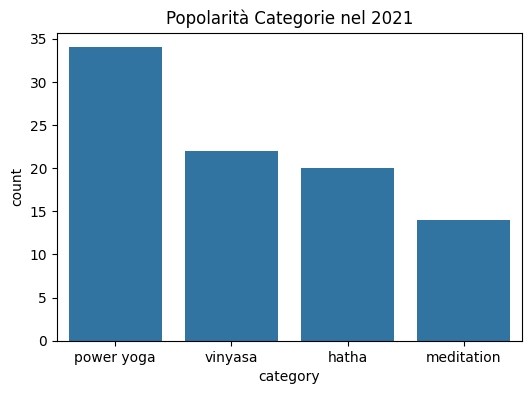

In [18]:
#Classifca categorie 

plt.figure(figsize=(6,4))
sns.countplot(data=df_2021, x='category', order= order_cat)
plt.title('Popolarità Categorie nel 2021')
plt.show()

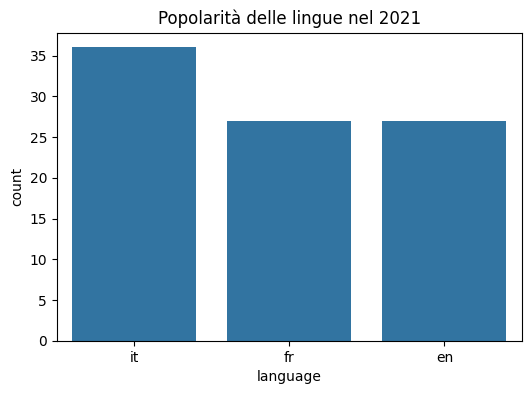

In [19]:
lang_order = df_2021['language'].value_counts().index

plt.figure(figsize=(6,4))
sns.countplot(data=df_2021, x = 'language',order = lang_order)
plt.title('Popolarità delle lingue nel 2021')
plt.show()

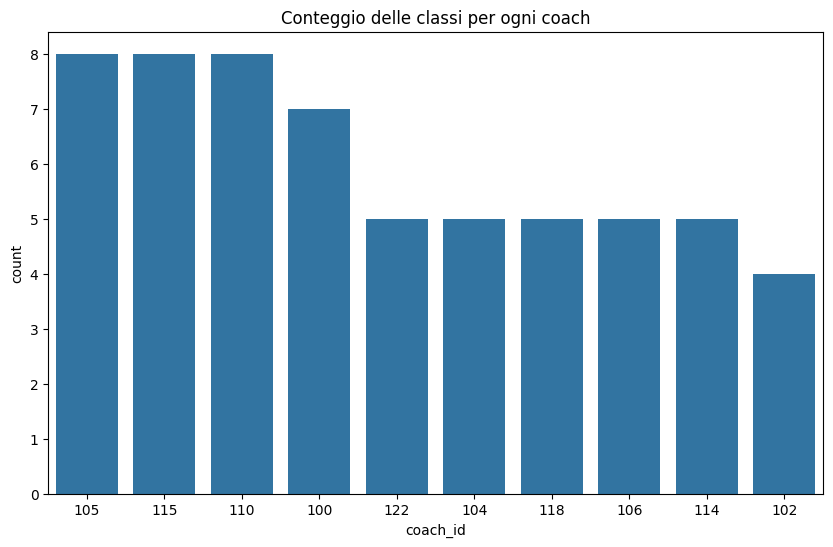

In [20]:
order_coach = df_2021['coach_id'].value_counts()

top_10_coach = order_coach.head(10).index

plt.figure(figsize=(10,6))
sns.countplot(data=df_2021,x='coach_id',order=top_10_coach)
plt.title('Conteggio delle classi per ogni coach')
plt.show()

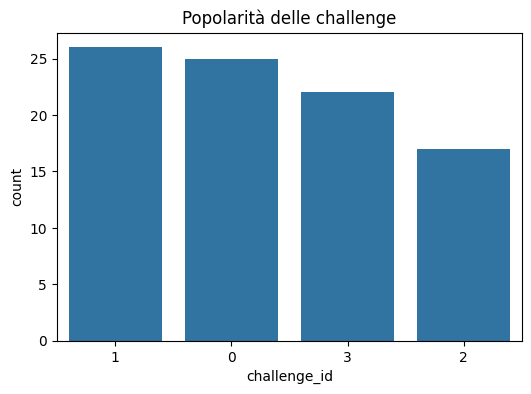

In [21]:
order_chall = df_2021['challenge_id'].value_counts().index

plt.figure(figsize=(6,4))
sns.countplot(data=df_2021,x='challenge_id', order = order_chall)
plt.title('Popolarità delle challenge')
plt.show()

In [22]:
usr_count = df_2021['user_uuid'].nunique()
coac_count= df_2021['coach_id'].nunique()
clas_count= df_2021['class_id'].nunique()
Class_date_uniq = df_2021['class_date'].nunique()
class_date_count = df_2021['class_date'].count()

stats = {
    "N. Utenti nel 2021": usr_count,
    "N. Coach nel 2021": coac_count,
    'N. di classi nel 2021': clas_count,
    "N. giorni con accessi all'app": Class_date_uniq,
    "N. di classi fatte nel 2021": class_date_count
}

# Ciclo for per stampare le informazioni
for descrizione, valore in stats.items():
    print(f"{descrizione}: {valore}")



N. Utenti nel 2021: 55
N. Coach nel 2021: 22
N. di classi nel 2021: 86
N. giorni con accessi all'app: 77
N. di classi fatte nel 2021: 90


In [23]:
df_2021['month'] = df_2021['class_date'].dt.month_name()

top_3_month = df_2021['month'].value_counts().head(3)


result_t = top_3_month.reset_index()

result_t.columns = ['month','N. of class made']

print('ranking')
print(result_t.to_string(index=False))

ranking
    month  N. of class made
     July                14
September                14
     June                10


In [24]:
result_country = df_2021['country'].value_counts().reset_index()

result_country.columns = ['country','N. Utenti per country']

print('Country')
print(result_country.to_string(index=False))

Country
country  N. Utenti per country
     it                     36
     fr                     27
     uk                     27


In [25]:
top_class = df.groupby(['category','class_id'])['class_date'].count().reset_index()

top_class.columns = ['category', 'ID class', 'number of classes']

top_class = top_class.sort_values(by='number of classes',ascending=False).head(5)

print('ranking')
print(top_class.to_string(index=False))

ranking
  category  ID class  number of classes
power yoga      6215                  6
power yoga      6283                  6
power yoga      6263                  5
     hatha      3251                  5
power yoga      6237                  5


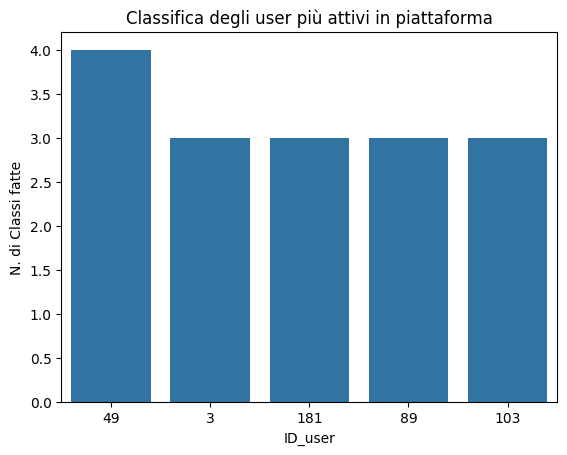

In [26]:
top_user = df_2021.groupby('user_uuid')['class_date'].count().reset_index()
top_user.columns = ['ID_user','N. di Classi fatte']

top_user = top_user.sort_values(by='N. di Classi fatte',ascending=False).head(5)

sns.barplot(data=top_user,x='ID_user',y='N. di Classi fatte', order=top_user['ID_user'])
plt.title('Classifica degli user più attivi in piattaforma')
plt.show()

In [27]:
print('hello world')

hello world


In [28]:
print('ciao')

ciao


In [ ]:
print('come stai?')